<a href="https://colab.research.google.com/github/aniljacob/AIML/blob/main/U4W23_58_Keras_ResNet50_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objective

At the end of the experiment, you will be able to:

* use keras to predict the image using ResNet50 pre-trained model

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Keras_Resnet50.mp4" type="video/mp4">
</video>
""")

### History

#### ResNet50

ResNet-50 is a pretrained Deep Learning model for image classification of the Convolutional Neural Network(CNN, or ConvNet), which is a class of deep neural networks, most commonly applied to analyzing visual imagery. ResNet-50 is 50 layers deep and is trained on a million images of 1000 categories from the ImageNet database. Furthermore the model has over 23 million trainable parameters, which indicates a deep architecture that makes it better for image recognition. 

Using a pretrained model is a highly effective approach, compared if you need to build it from scratch, where you need to collect great amounts of data and train it yourself. There are other pretrained deep models to use such as AlexNet, GoogleNet or VGG19, but the ResNet-50 is noted for excellent generalization performance with fewer error rates on recognition tasks.

### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100706" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7702777831" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U4W23_58_Keras_ResNet50_C" #name of the notebook

def setup():
    #ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week12/Exp1/wikipedia_dataset.tar.gz")
    #ipython.magic("sx pip install keras_retinanet")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/elephant.jpg")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/bear.jpeg")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/banana.jpeg")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
# Importing ResNet50 model in keras
from tensorflow.keras.applications.resnet50 import ResNet50

# keras provides data preprocessing utils to pre-process the dataset before they are fed to the model
# image module contains a set of tools for real-time data augmentation on image data
from tensorflow.keras.preprocessing import image

# From ResNet50 importing 'preprocess_input' to preprocess a tensor or Numpy array encoding a batch of images
# decode_predictions - Decodes the prediction of an ImageNet model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
import numpy as np

### Loading the Image

In [5]:
# First we download the image and specify the path  
img_path = '/content/bear.jpeg'

### Visualizing the Image

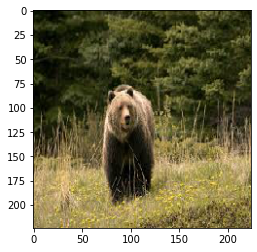

In [6]:
# Load the image and set the target size to 224x224
# Since that is the format ResNet reads
img = image.load_img(img_path, target_size=(224, 224))

# Plot the image
plt.imshow(img)

### Pre-processing the image for Resnet50

Keras provides support for importing images and performing pre-processing before prediction

In [7]:
# Convert the image into an numpy array
# In Numpy - image is in (height, widht, channels)
numpy_img = image.img_to_array(img)

# Convert the image/images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add extra dimension to the axis=0
img_batch = np.expand_dims(numpy_img, axis=0)

print('Original Image size - ', img.size)
print('Numpy Image size - ', numpy_img.shape)
print('Batch Image size - ', img_batch.shape)

Original Image size -  (224, 224)
Numpy Image size -  (224, 224, 3)
Batch Image size -  (1, 224, 224, 3)


The image that was setup in the previous step should be normalized by subtracting the mean of the ImageNet data. This is required since the images were trained after pre-processing.

Pre-process the image by subtracting the mean value from each channel of the images in the batch. Mean is the array of elements obtained by the average of R,G,B pixels of all images obtained from imagenet. This is done using the pre-process_input function.

In [8]:
# Preprocess the loaded image for network (Normalize the image)
processed_img = preprocess_input(img_batch)

### Make a prediction using the ResNet50 Model

In [9]:
# Load the ResNet50 model architecture and the imagenet weights for the network
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [10]:
# Get the classification result by calling the model.predict function 
preds = model.predict(processed_img)

In [11]:
# Convert the result to human readable labels, using the decode_predictions method. 
# This method takes the classification result, sorts it according to the prediction and returns the class name.
# decode the results into a list of tuples (class, description, probability)

print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02132136', 'brown_bear', 0.9867367), ('n02133161', 'American_black_bear', 0.007995876), ('n02106382', 'Bouvier_des_Flandres', 0.0024007927)]


You can also try loading the other images and see the predictions from the ResNet50 Model for a given image

### Please answer the questions below to complete the experiment:

In [12]:
#@title State TRUE or FALSE: While using pre-trained model, it is not always mandatory to use 'preprocess_input' function to format the model it requires.
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [14]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [15]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [16]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [17]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 15421
Date of submission:  26 Jun 2021
Time of submission:  09:55:51
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
